In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = r"D:\5.DataAnalysis\3\Machine Learning A-Z (Model Selection)-20230404T171948Z-001\Machine Learning A-Z (Model Selection)\Regression\Data.csv"
data = pd.read_csv(file)
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
data.shape

(9568, 5)

In [4]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### The Correlation between the different parameters

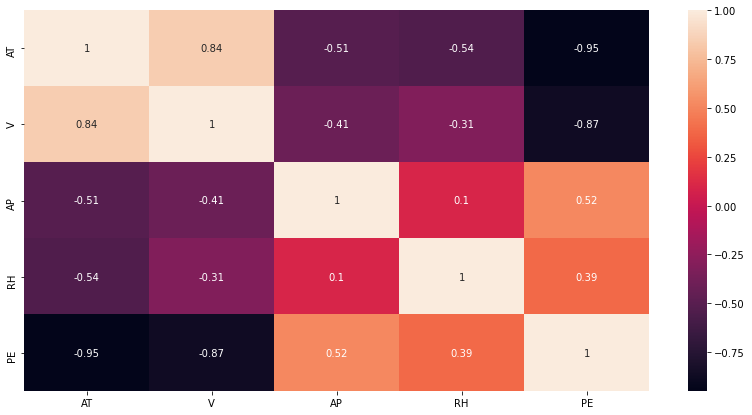

In [5]:
plt.figure(figsize = (14, 7))
sns.heatmap(data.corr(), annot = True)

### The Problem:
#### predicting the PE based on the AT,V,AP,RH

#### Ambient Temperature (AT) in °C 
#### Ambient Pressure (AP) in  millibar,
#### Relative Humidity (RH) in %
#### Exhaust Vacuum (V) in cm Hg
#### Net hourly electrical energy output (PE) in MW

In [6]:
#Preparing the data

x= data.iloc[:,:-1].values
y=data.iloc[:,-1].values


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### 1- Multiple linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
multi_linear=LinearRegression()
multi_linear.fit(x_train,y_train)
multi_linear.predict(x_test)

array([431.42761597, 458.56124622, 462.75264705, ..., 469.51835895,
       442.41759454, 461.88279939])

In [11]:
np.concatenate((y_test.reshape(-1, 1), multi_linear.predict(x_test).reshape(-1,1)), axis=1)

array([[431.23      , 431.42761597],
       [460.01      , 458.56124622],
       [461.14      , 462.75264705],
       ...,
       [473.26      , 469.51835895],
       [438.        , 442.41759454],
       [463.28      , 461.88279939]])

### 2 - Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)
poly_x_train = poly_reg.fit_transform(x_train)
poly_x_test = poly_reg.fit_transform(x_test)

poly_regression = LinearRegression()
poly_regression.fit(poly_x_train,y_train)
poly_regression.predict(poly_x_test)

array([433.94455845, 457.90778237, 460.5310957 , ..., 469.53125207,
       438.26918722, 461.6637279 ])

In [13]:
np.concatenate((y_test.reshape(-1, 1), poly_regression.predict(poly_x_test).reshape(-1,1)), axis=1)

array([[431.23      , 433.94455845],
       [460.01      , 457.90778237],
       [461.14      , 460.5310957 ],
       ...,
       [473.26      , 469.53125207],
       [438.        , 438.26918722],
       [463.28      , 461.6637279 ]])

### 3 - Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor
tree_regression = DecisionTreeRegressor(random_state=0)
tree_regression.fit(x_train,y_train)
tree_regression.predict(x_test)

array([431.28, 459.59, 460.06, ..., 471.46, 437.76, 462.74])

In [15]:
np.concatenate((y_test.reshape(-1, 1), tree_regression.predict(x_test).reshape(-1,1)), axis=1)

array([[431.23, 431.28],
       [460.01, 459.59],
       [461.14, 460.06],
       ...,
       [473.26, 471.46],
       [438.  , 437.76],
       [463.28, 462.74]])

### 4 - Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
forest_regression = RandomForestRegressor(n_estimators=10, random_state=0)
forest_regression.fit(x_train,y_train)
forest_regression.predict(x_test)

array([434.049, 458.785, 463.02 , ..., 469.479, 439.566, 460.385])

In [17]:
np.concatenate((y_test.reshape(-1, 1), forest_regression.predict(x_test).reshape(-1,1)), axis=1)

array([[431.23 , 434.049],
       [460.01 , 458.785],
       [461.14 , 463.02 ],
       ...,
       [473.26 , 469.479],
       [438.   , 439.566],
       [463.28 , 460.385]])

### Models Performance evaluation using R2

In [18]:
y_pred_ml = multi_linear.predict(x_test)
y_pred_poly =poly_regression.predict(poly_x_test)
y_pred_tree =tree_regression.predict(x_test)
y_pred_forst= forest_regression.predict(x_test)

In [19]:
from sklearn.metrics import r2_score

In [22]:
def R2_Calculater(y_test, y_1,y_2,y_3,y_4):
    
    R2_1=r2_score(y_test, y_1)
    R2_2=r2_score(y_test, y_2)
    R2_3=r2_score(y_test, y_3)
    R2_4=r2_score(y_test, y_4)
    return ('R2 for ML = {:.3f}, R2 for Poly = {:.3f} , R2 for DT = {:.3f} and R2 for RF = {:.3f} )'.format(R2_1,R2_2,R2_3,R2_4))

In [23]:
R2_Calculater(y_test, y_pred_ml, y_pred_poly, y_pred_tree, y_pred_forst)

'R2 for ML = 0.933, R2 for Poly = 0.946 , R2 for DT = 0.923 and R2 for RF = 0.962 )'